In [0]:
import math
import matplotlib.pyplot as plt
import numpy as np
import timeit
start_time = timeit.default_timer()

n = 100  # Number of floors travelled
D = 4*n  # Distance travelled
rho = 360  # Density of lift material
hl = 2  # Height of lift
app = 0.36  # Area per person
mpp = 75  # Average mass of one person
g = 9.81  # Gravity
#p = C  # Lift is at capacity
#mp = 75*p  # Mass of passengers

  # Area of lift





[400.66666666666663, 336.38783313359585, 289.97365381306986, 254.89665889665892, 227.46416546416546, 205.4301086466035, 187.3498363920899, 172.25194473470336, 159.45915999302454, 148.48484848484847, 138.97034939941514, 130.64550264550266, 123.30293763321288, 116.78083338198947, 110.95106314284396, 105.7108585858586, 100.97683200909007, 96.68061340099254, 92.76561533704391, 89.18459961938223, 85.89782304604852, 82.87160764269198, 80.07722616233255, 77.490024624353, 75.0887250887251, 72.8548669036474, 70.77235536931997, 68.82709447415331, 67.00668598291419, 65.30018130018131, 63.69787561715813, 62.191136167880366, 60.772258178198776, 59.43434343434344, 58.1711974329424, 56.977241877765444, 55.84743991640544, 54.77723200416468, 53.762480673564724, 52.79942279942281, 51.884628198947176, 51.01496360721873, 50.187561231039496, 49.399791216385104, 48.649237472766885, 47.933676386506576, 47.25105802803645, 46.59948951884436, 45.97722027395618, 45.382628877774515, 44.814211386184695, 44.2705708

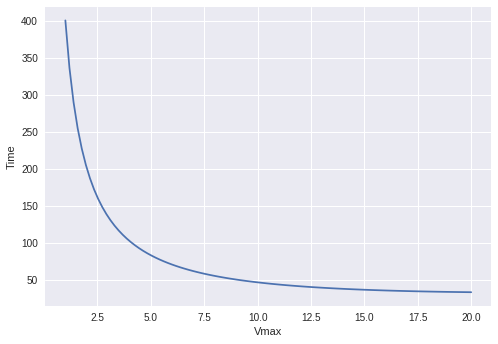

In [3]:
#a = np.linspace(0, 1.5, 100)
vmax = np.linspace(1,20,100)
a = 1.5

Ts = []
for v in vmax:
  T = (D-v**2/a)/v + (2*v/a)
  Ts.append(T)
  if v == 20:
    print Ts
  
  
plt.plot(vmax, Ts)
plt.xlabel('Vmax')
plt.ylabel("Time")
plt.show()



[170.0, 151.4159292035398, 136.92913385826773, 125.31914893617021, 115.80645161290322, 107.86982248520711, 101.14754098360656, 95.38071065989848, 90.37914691943129, 86.0, 82.13389121338912, 78.69565217391305, 75.6179775280899, 72.84697508896798, 70.33898305084746, 68.05825242718446, 65.97523219814242, 64.06528189910979, 62.307692307692314, 60.68493150684931, 59.1820580474934, 57.786259541984734, 56.48648648648649, 55.273159144893114, 54.13793103448276, 53.073496659242764, 52.07343412526998, 51.132075471698116, 50.24439918533605, 49.405940594059416, 48.612716763005785, 47.86116322701689, 47.14808043875686, 46.470588235294116, 45.82608695652174, 45.212224108658745, 44.626865671641795, 44.068071312803895, 43.53407290015848, 43.02325581395349, 42.53414264036419, 42.065378900445765, 41.61572052401747, 41.18402282453638, 40.769230769230774, 40.37037037037037, 39.98654104979812, 39.61690885072655, 39.26070038910506, 38.9171974522293, 38.58573216520651, 38.26568265682657, 37.956469165659016, 3

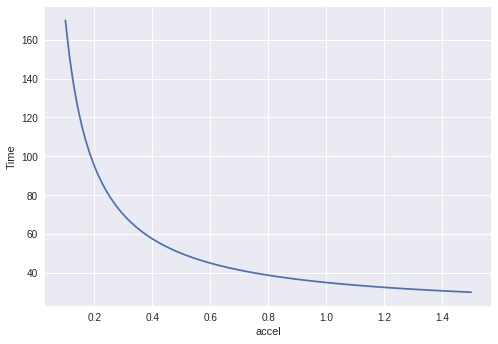

In [4]:
accel = np.linspace(0.1, 1.5, 100)
#vmax = np.linspace(1,20,100)
vmax = 10

Ts = []
for a in accel:
  T = (D-vmax**2/a)/v + (2*vmax/a)
  Ts.append(T)
  if a == 1.5:
    print Ts
  
  
plt.plot(accel, Ts)
plt.xlabel('accel')
plt.ylabel("Time")
plt.show()


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars


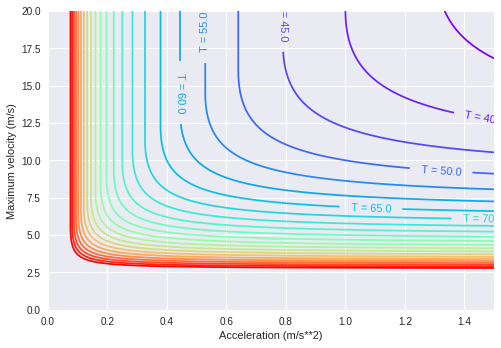

In [5]:
def travel(n, vmax, a, df, td):
  """
  Travel function for total time taken to go n floors
  
  vmax = 10   # maximum velocity
  a    = 0.5  # acceleration of lift
  df   = 4    # distance between floors
  td   = 3    # time to operate doors
  """
  
  if a <= 0:
    return 9999
    
  smv  = vmax**2 /(2*a)  # distance to reach max v
  tmv  = vmax / a        # time to reach max v
  
  dist = df*n

  if dist > 2*smv:
    return 2*tmv + (dist - 2*smv)/vmax + 2*td
  
  elif dist <= 2*smv:
    return 2*td + 2*math.sqrt(dist/a)
  
  else:
    raise ValueError()



a = np.linspace(0,1.5,1000)
vmax = np.linspace(0,20,1000)

A, Vm = np.meshgrid(a, vmax)

#T = f(X1, X2)
# def calcT(vmax, a):
#   return (D-vmax**2/a)/vmax + (2*vmax/a)


Ts = np.zeros(np.shape(A)) # empty array

for (x,y), value in np.ndenumerate(Ts):
  Ts[x,y] = travel(n=100, vmax=Vm[x,y], a=A[x,y], df=4, td=0)




Ts = np.clip(Ts, a_min=None, a_max=150)

# Plot f(x)
contours = plt.contour(A, Vm, Ts, 25, cmap="rainbow");
plt.xlabel('Acceleration (m/s**2)')
plt.ylabel('Maximum velocity (m/s)')
plt.gca().clabel(contours, contours.levels[:8], inline=True, fontsize=11, 
                 fmt="T = %1.1f", use_clabeltext=True)

plt.show()







334.2


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


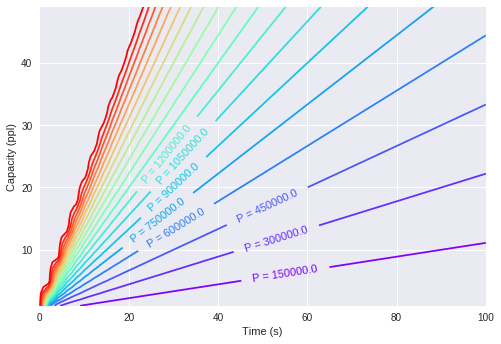

In [6]:

def mass (C):  # Mass as a function of lift material density and capacity
  p = C
  mp = mpp*p
  Al = app*C
  V = Al*hl
  m = mp + rho*V
  return m

def Power (C,T):
  gpE = 344.2*C*D*g
  Ek = 0.5*334.2*C*(D/T)**2
  return (gpE)/T

print mass(1)
time = np.linspace(0,100,50)
capacity = np.arange(1,50)

T, C = np.meshgrid(time, capacity)

P = np.zeros(np.shape(T)) # empty array

for (x,y), value in np.ndenumerate(P):
  P[x,y] = Power(C=C[x,y],T=T[x,y])

P = np.clip(P, a_min=None, a_max=3000000)

contours = plt.contour(T, C, P, 25, cmap="rainbow");
plt.xlabel('Time (s)')
plt.ylabel('Capacity (ppl)')
plt.gca().clabel(contours, contours.levels[:8], inline=True, fontsize=11, 
                 fmt="P = %1.1f", use_clabeltext=True)

plt.show()

**Feedback**

Good attempt at formulating the optimisation problem and conducting preliminary calculations.

Suggest applying monotonicity analysis to check the activity of boundedness. Currently, it is
monotonic and the optimum lies on the boundary.There is room to make the problem more
interesting. 

For the next stage, suggest revising the objective functions. The effect of acceleration on
power requirements as well as its impact on lift weight is something that is worth considering in the
next step.

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars


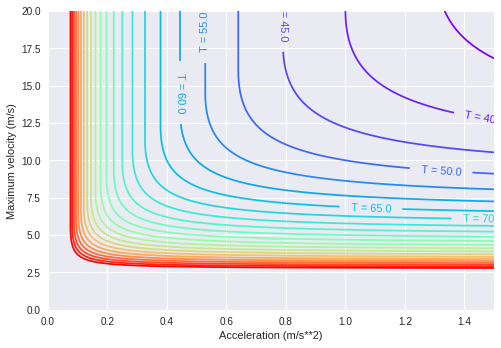

In [7]:
def travel(n, vmax, a, df, td):
  """
  Travel function for total time taken to go n floors
  
  vmax = 10   # maximum velocity
  a    = 0.5  # acceleration of lift
  df   = 4    # distance between floors
  td   = 3    # time to operate doors
  """
  
  if a <= 0:
    return 9999
    
  smv  = vmax**2 /(2*a)  # distance to reach max v
  tmv  = vmax / a        # time to reach max v
  
  dist = df*n

  if dist > 2*smv:
    return 2*tmv + (dist - 2*smv)/vmax + 2*td
  
  elif dist <= 2*smv:
    return 2*td + 2*math.sqrt(dist/a)
  
  else:
    raise ValueError()



a = np.linspace(0,1.5,1000)
vmax = np.linspace(0,20,1000)

A, Vm = np.meshgrid(a, vmax)

#T = f(X1, X2)
# def calcT(vmax, a):
#   return (D-vmax**2/a)/vmax + (2*vmax/a)


Ts = np.zeros(np.shape(A)) # empty array

for (x,y), value in np.ndenumerate(Ts):
  Ts[x,y] = travel(n=100, vmax=Vm[x,y], a=A[x,y], df=4, td=0)

plt.plot(dist=2*(vmax**2/2*a))


Ts = np.clip(Ts, a_min=None, a_max=150)

# Plot f(x)
contours = plt.contour(A, Vm, Ts, 25, cmap="rainbow");
plt.xlabel('Acceleration (m/s**2)')
plt.ylabel('Maximum velocity (m/s)')
plt.gca().clabel(contours, contours.levels[:8], inline=True, fontsize=11, 
                 fmt="T = %1.1f", use_clabeltext=True)

plt.show()






[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


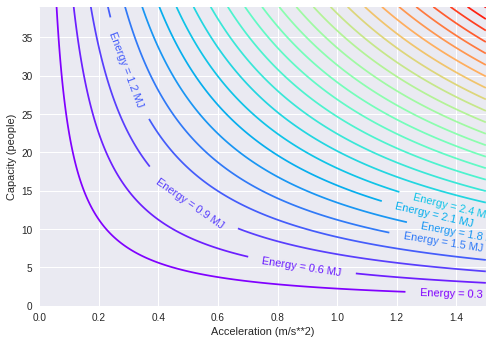

In [8]:
mpp = 75
p = 360
App = 0.36
h = 2
D = 400

C = range(40)
print C
a = np.linspace(0,1.5,1000)
E = []

#C, A = np.meshgrid(C, a)
for c in C:
  EC = []
  for i in a:
    EC.append(((mpp*c+p*App*h*c)*i*D)/1000000)
  E.append(EC)
#E = np.zeros(np.shape(C)) # empty array

#for (x,y), value in np.ndenumerate(E):
  #Ts[x,y] = travel(n=100, c=C[x,y], a=A[x,y], df=4, td=0)
 # E[x,y] = (mpp*C[x,y]+p*App*h*C[x,y])*a[x,y]*D

#E = np.clip(E, a_min=None, a_max=150)
#print len(E[0])
#print type(C)
#print C
#print type(a)
#print a
# Plot f(x)
EnergyPlot = plt.contour(a, C, E, 30, cmap="rainbow");
plt.xlabel('Acceleration (m/s**2)')
plt.ylabel('Capacity (people)')
plt.gca().clabel(EnergyPlot, EnergyPlot.levels[:8], inline=True, fontsize=11,
                 fmt="Energy = %1.1f MJ", use_clabeltext=True)

plt.show()


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


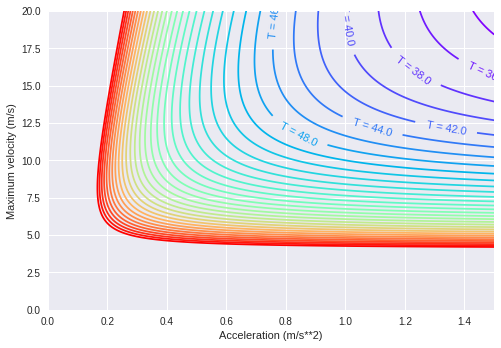

13.597083807


In [9]:
def travel(n, vmax, a, df, td):
  """
  Travel function for total time taken to go n floors
  
  vmax = 10   # maximum velocity
  a    = 0.5  # acceleration of lift
  df   = 4    # distance between floors
  td   = 3    # time to operate doors
  """
  
  if a <= 0:
    return 9999
    
  smv  = vmax**2 /(2*a)  # distance to reach max v
  tmv  = vmax / a        # time to reach max v
  
  dist = df*n
  
  return vmax/a + dist/vmax
  #if dist > 2*smv:
  #eturn (dist*a + vmax**2)/vmax*a
  
  #elif dist <= 2*smv:
   # return 2*td + 2*math.sqrt(dist/a)
  
  #else:
   # raise ValueError()



a = np.linspace(0,1.5,1000)
vmax = np.linspace(0,20,1000)

A, Vm = np.meshgrid(a, vmax)

#T = f(X1, X2)
# def calcT(vmax, a):
#   return (D-vmax**2/a)/vmax + (2*vmax/a)


Ts = np.zeros(np.shape(A)) # empty array

for (x,y), value in np.ndenumerate(Ts):
  Ts[x,y] = travel(n=100, vmax=Vm[x,y], a=A[x,y], df=4, td=0)




Ts = np.clip(Ts, a_min=None, a_max=100)

# Plot f(x)
contours = plt.contour(A, Vm, Ts, 40, cmap="rainbow");
plt.xlabel('Acceleration (m/s**2)')
plt.ylabel('Maximum velocity (m/s)')
plt.gca().clabel(contours, contours.levels[:8], inline=True, fontsize=11, 
                 fmt="T = %1.1f", use_clabeltext=True)

plt.show()
elapsed = timeit.default_timer() - start_time
print elapsed